##faults data 를 가지고 학습 하기 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sns 


In [4]:
faults = pd.read_csv('/content/faults.csv')

In [5]:
faults.info()
'''
독립변수 0~ 26  
종속변수 27 ~ 33
이때 종속 변수 는 편향 도 발생 할수 있는데 
정밀도 를 해야하는데 다음 시간에.. 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

'\n독립변수 0~ 26  \n종속변수 27 ~ 33\n이때 종속 변수 는 편향 도 발생 할수 있는데 \n정밀도 를 해야하는데 다음 시간에.. \n'

In [6]:
faults.describe()
'''
독립 변수 간의 편차 가 크면 신경망의 영향이 있음 
'''

'\n독립 변수 간의 편차 가 크면 신경망의 영향이 있음 \n'

In [7]:
#정규화 가 필요 하다... 

faults_norm = (faults - faults.min()) / (faults.max() - faults.min())
faults_norm.describe()
faults_shuffle = faults_norm.sample(frac=1) #모델 셔플링

'''
처음부터 sampleing 을 하는 이유는 종속변수를 train 은 앞에 만 사용하고 test 는 뒤에만 사용한다.
그래서 적절히 섞어 줘야 한다
'''

'\n처음부터 sampleing 을 하는 이유는 종속변수를 train 은 앞에 만 사용하고 test 는 뒤에만 사용한다.\n그래서 적절히 섞어 줘야 한다\n'

In [8]:
#numpy 화 시키기
faults_np = faults_shuffle.to_numpy()

In [9]:
#train_test_split
train_ratio = 0.93
input_cnt = 27
output_cnt = 7 
train_idx = int(len(faults_np) * train_ratio)
print(train_idx)

1805


In [10]:
#train_test_split
train_x,train_y = faults_np[:train_idx,:-output_cnt],faults_np[:train_idx,-output_cnt:]
test_x ,test_y = faults_np[train_idx: ,:-output_cnt],faults_np[train_idx: , -output_cnt:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1805, 27)
(1805, 7)
(136, 27)
(136, 7)


In [11]:
#model 생성 
faults_Net = tf.keras.Sequential([
                                    tf.keras.layers.Dense(units = 48,
                                                          activation='elu',
                                                          input_shape =(27,)),
                                  tf.keras.layers.Dense(units = 24,
                                                        activation = 'elu'),
                                  tf.keras.layers.Dense(units = 12,activation = 'elu'),
                                  tf.keras.layers.Dense(units = 7,activation = 'softmax')

])



In [12]:
faults_Net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [13]:
faults_Net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = 'categorical_crossentropy')


In [14]:
hisotry = faults_Net.fit(train_x,train_y,epochs=300,batch_size=10)
'''
model 에 대한 weight bias 를 fit 함수에서 학습을 한다.
'''

Epoch 1/300
181/181 [==============================] - 1s 1ms/step - loss: 1.7761
Epoch 2/300
181/181 [==============================] - 0s 1ms/step - loss: 1.5993
Epoch 3/300
181/181 [==============================] - 0s 1ms/step - loss: 1.4989
Epoch 4/300
181/181 [==============================] - 0s 1ms/step - loss: 1.4150
Epoch 5/300
181/181 [==============================] - 0s 1ms/step - loss: 1.3402
Epoch 6/300
181/181 [==============================] - 0s 1ms/step - loss: 1.2796
Epoch 7/300
181/181 [==============================] - 0s 1ms/step - loss: 1.2327
Epoch 8/300
181/181 [==============================] - 0s 1ms/step - loss: 1.1935
Epoch 9/300
181/181 [==============================] - 0s 1ms/step - loss: 1.1633
Epoch 10/300
181/181 [==============================] - 0s 1ms/step - loss: 1.1372
Epoch 11/300
181/181 [==============================] - 0s 1ms/step - loss: 1.1146
Epoch 12/300
181/181 [==============================] - 0s 1ms/step - loss: 1.0964
Epoch 13/300


'\nmodel 에 대한 weight bias 를 fit 함수에서 학습을 한다.\n'

In [21]:
faults_Net.evaluate(test_x)
'''
loss
'''

5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00


0.0

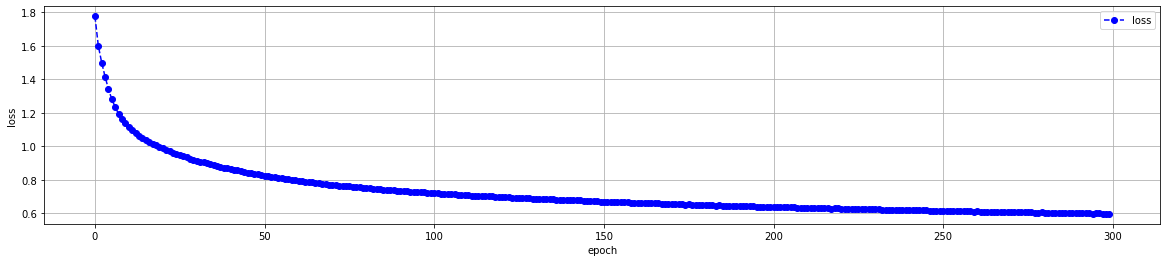

'\n값의 변화가 없을수가 없다. 왜냐하면 weight 값 과 bias 값이 fit 을 할떄 마다 바뀌기 떄문에 \n값이 달라지는게 자연스럽다.\n'

In [16]:
#matplot 시각화 
plt.figure(figsize = (20,4))
plt.plot(hisotry.history['loss'],'--o',color = 'blue',label ='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

'''
값의 변화가 없을수가 없다. 왜냐하면 weight 값 과 bias 값이 fit 을 할떄 마다 바뀌기 떄문에 
값이 달라지는게 자연스럽다.
'''

In [17]:
#정확도 
predict_y = faults_Net.predict(test_x)
#print(predict_y) #7개의 종속변수에 대한 예측 확률 값이 나온다.

pred_arg = np.argmax(predict_y,axis =1)
print(pred_arg)
print('-------------------------------------')

test_arg = np.argmax(test_y,axis =1)
print(test_arg)

[5 6 2 5 1 6 6 2 0 6 0 6 6 6 6 5 1 3 0 6 5 2 2 2 6 5 6 6 5 6 0 2 6 0 6 5 6
 6 6 6 0 2 0 0 6 5 6 0 2 5 6 5 0 6 2 6 6 5 6 6 5 5 6 1 1 2 2 6 6 5 6 0 6 5
 6 5 6 6 2 2 2 0 0 0 2 6 6 3 5 1 6 2 5 6 6 0 5 2 6 2 6 0 5 3 1 2 6 0 6 0 6
 1 5 6 6 0 2 4 5 2 5 6 4 2 1 2 6 5 2 0 6 6 2 1 5 2]
-------------------------------------
[6 6 2 5 1 6 6 2 0 6 5 6 6 5 6 5 0 3 0 6 6 2 2 2 6 5 6 6 5 6 0 2 6 0 6 5 6
 6 0 0 0 2 6 0 6 5 6 0 2 6 6 5 6 6 2 6 6 5 6 6 5 5 6 1 1 2 2 5 0 5 6 6 6 5
 6 5 4 0 2 2 2 0 0 6 6 5 6 3 5 1 6 2 6 3 0 0 5 2 6 2 5 6 6 3 1 2 6 0 4 6 6
 1 3 5 6 0 2 6 6 2 5 6 6 2 1 2 5 5 2 6 6 6 2 1 6 2]


In [18]:
print(np.mean(np.equal(pred_arg,test_arg)))
print('acc:',np.mean(np.equal(pred_arg,test_arg)) * 100)

0.75
acc: 75.0


In [19]:
#모델의 가중치 확인 
faults_Net.weights

[<tf.Variable 'dense/kernel:0' shape=(27, 48) dtype=float32, numpy=
 array([[-0.18040155, -0.46203074,  0.18859555, ..., -0.11814015,
          0.09822435, -0.20572062],
        [-0.14248517, -0.3630178 , -0.07379108, ...,  0.06717882,
          0.1553542 , -0.15829945],
        [ 0.07486224, -0.14893949, -0.05383327, ...,  0.19762965,
         -0.675316  ,  0.06496504],
        ...,
        [-0.0590314 , -0.18697995,  0.0522502 , ...,  0.1444738 ,
         -0.17217994, -0.27246684],
        [ 0.11341915,  0.1804941 ,  0.13541143, ..., -0.09552591,
          0.0187022 ,  0.11207201],
        [ 0.00969097,  0.1257838 , -0.26950887, ...,  0.32093582,
          0.03763675, -0.2055969 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(48,) dtype=float32, numpy=
 array([ 0.09691066,  0.03539228,  0.03478257, -0.11031426,  0.08343929,
         0.00587161,  0.01842432,  0.07152168,  0.03549996,  0.03663623,
        -0.06549408,  0.0112848 ,  0.11957545, -0.07014371,  0.04039492,
       